# Rtree学习

In [1]:
import pickle, rtree

In [2]:
from rtree import index

In [3]:
idx = index.Index()

In [4]:
from shapely.geometry import Polygon

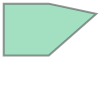

In [5]:
a=Polygon(((114.244763,29.109605),(117.134619,29.109605),(120.181830,31.782197),(117.134619,32.431841),(114.244763,32.431841),(114.244763,29.109605)))
a

In [6]:
#多边形的边框，正方形
a.bounds

(114.244763, 29.109605, 120.18183, 32.431841)

In [7]:
b = (114.244463, 29.103605, 121.1183, 33.4322841)
b

(114.244463, 29.103605, 121.1183, 33.4322841)

In [10]:
#在idx中插入一个索引0他的二维方框是a.bounds ,又插入了一个索引1，他的二维位置如下
idx.insert(1,a.bounds)
idx.insert(2,(114.244463, 29.103605, 114.244463, 29.103605))#

In [25]:
#idx所有的边框，正方形
idx.bounds

[114.244463, 29.103605, 120.18183, 32.431841]

In [26]:
# nearest(二维代码，返回最近的数量= 1 )
list(idx.nearest((1.0000001, 1.0000001, 2.0, 2.0), 1))

[1]

In [ ]:
#obj 是一个
idx.insert(id = 4, coordinates = a.bounds, obj=42)

In [ ]:
list(idx.intersection((114.244463, 29.103205, 121.1183, 33.4322841)))

In [ ]:
for x in idx.intersection((114.244463, 29.103205, 121.1183, 33.4322841)):
    print(x)

In [ ]:
for x in idx.intersection((114.244463, 29.103205, 121.1183, 33.4322841),objects=True):
    print(x.object)

In [ ]:
[n.object for n in idx.intersection(a.bounds, objects=True)]

In [ ]:
#将Rtree索引序列化到文件
file_idx = index.Rtree('rtree')
file_idx.insert(1, a.bounds)
file_idx.insert(2, b)
[print(n) for n in file_idx.intersection(a.bounds)]

In [ ]:
from rtree import index
import pandas as pd

data = pd.read_csv('c:/Users/Administrator/Desktop/rtree/AllData.csv',encoding = 'gbk')
def generator_function(somedata):
    for i, obj in somedata.iterrows():
        print(i)
        yield (i, (obj.xmin, obj.ymin, obj.xmax, obj.ymax), obj)
r = index.Index(generator_function(data))

In [ ]:
r.

In [ ]:
r.properties

In [ ]:
r.leaves()

In [ ]:
def generator_function(somedata):
    for i, obj in somedata.iterrows():
        yield (i)

In [ ]:
def generator_function(data):
    for i, obj in data.iterrows():
    yield (i,obj)

In [ ]:
a = generator_function(data) 

In [ ]:
for x in a:
    print(x)

In [ ]:
# gpd.jsoin中用的rtree代码
right_df_bounds = right_df.geometry.apply(lambda x: x.bounds)
stream = ((i, b, None) for i, b in enumerate(right_df_bounds))
tree_idx = rtree.index.Index(stream)

idxmatch = (left_df.geometry.apply(lambda x: x.bounds)
            .apply(lambda x: list(tree_idx.intersection(x))))
idxmatch = idxmatch[idxmatch.apply(len) > 0]

In [ ]:
#一个例子，rtree python

spatial_index = gdf.sindex #创建了Rtree的空间索引，是一个正方块
possible_matches_index = list(spatial_index.intersection(polygon.bounds))#将这个索引与多变形相交
possible_matches = gdf.iloc[possible_matches_index] # 相交的部分取出来
precise_matches = possible_matches[possible_matches.intersects(polygon)] #用实际区域相交

In [ ]:
a = data_zhan_buff.sindex

In [30]:
import pandas as pd
import geopandas as gpd
import numpy as np
import app.mydef as md
mt=md.MyTools()
con = mt.con()
import app.netools as ant
nt = ant.NetTools()
from rtree import index

## 最近站点统计-Rtree

In [485]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [486]:
import pandas as pd
import geopandas as gpd
import numpy as np
import app.mydef as md
mt=md.MyTools()
con = mt.con()
import app.netools as ant
nt = ant.NetTools()
from rtree import index
from shapely.geometry import Point

In [456]:
#导入数据
data_zhan = pd.read_csv(open('./站间距计算/武汉小区.csv'))
data_zhan = data_zhan.loc[data_zhan['类别'] == '宏站']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [487]:
gongcan=pd.read_csv(open('g:/1-规划/工参/工参数据/ltejizhan20191209.csv',encoding = 'gbk'))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (15,17,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [488]:
gongcan.columns

Index(['小区CGI(*)', '小区中文名', '网络制式(TDD/FDD)', 'TDL规划站号(新)', '所属地区', '工程参数标识',
       '区县代码', '基站编码', 'VIP基站', '入网工程期', 'ATU网格', 'RRU经度', 'RRU纬度', '天线挂高',
       '地面海拔', '入网时间', '2G共址站名', '与FDD1800共址的FDD900站名', '站址归属单位', '覆盖类型',
       '覆盖类别', '覆盖场景', '覆盖场景细化', '二级覆盖场景', '二级覆盖场景细化', '场景名称', 'VOLTE场景',
       '方位角', '机械下倾角', '电子下倾角', '是否电调天线', '电下倾天线类型', '天线厂家', ' 工作频段', '设备型号',
       '设备类型(大类)', '分布式或一体化', '小区所属空间资源', '基站所属空间资源', 'eNodeB软件版本', '所属OMC',
       '归属区县', '厂家名称', '物理站名', '集中开站所在环节', '集中开站工单号', '姿态仪测量', '姿态仪测量时间',
       '所属eNodeB名称', '采集经度', '采集纬度', 'RRU数量', 'TAC', 'PCI', '中心载频的信道号', '频段指示',
       '空口上下行业务字节数KByte', '统计分类', '集中工参工单号', '开站流程类型'],
      dtype='object')

In [489]:
#数据整理
gongcan1 = gongcan.loc[(gongcan['RRU经度']>60)&(gongcan['RRU纬度']<60)]
data_zhan1=gongcan1[['小区中文名', 'RRU经度', 'RRU纬度']]

In [490]:
data_zhan1.columns

Index(['小区中文名', 'RRU经度', 'RRU纬度'], dtype='object')

In [496]:
mt.nearest_site(data_zhan1.head(100),id_name_column='小区中文名',lon='RRU经度',lat='RRU纬度',num_min_results = 2,Including_itself = False)

,level_0,index,小区中文名,RRU经度,RRU纬度,minimum_index_1,minimum_index_2,distance_1,distance_2,sum
0,0,0,公安群力-ELH-2,112.147350,30.124050,93,97,8719.062830,8719.062830,17438.125660
1,1,1,公安铜桥-ELH-1,112.011190,29.883020,3,4,3155.456593,3155.456593,6310.913187
2,2,2,公安响档口-ELH-1,112.043460,30.065790,0,95,11910.619467,16737.859157,28648.478624
3,3,3,公安欣荣-ELH-1,111.995620,29.858060,4,1,0.000000,3155.456593,3155.456593
4,4,4,公安欣荣-ELH-2,111.995620,29.858060,4,1,0.000000,3155.456593,3155.456593
...,...,...,...,...,...,...,...,...,...,...
95,95,95,荆州改口-ELH-2,112.021460,30.215110,98,2,0.000000,16737.859157,16737.859157
96,96,96,孝昌八里-ZFH-3,114.020431,31.416355,82,19,0.000000,34458.085253,34458.085253
97,97,97,公安青华寺-ELH-2,112.176810,30.198210,97,0,0.000000,8719.062830,8719.062830
98,98,98,荆州改口-ELH-1,112.021460,30.215110,98,2,0.000000,16737.859157,16737.859157


In [422]:
b='sdf'

In [420]:
type(a)

float

In [423]:
if isinstance(a,float) | isinstance(b,str):
    print(111)

111


In [182]:
ceshi = pd.DataFrame({'a':[1,2,3,4,3,2,2],'b':[1,2,3,5,3,2,2],'c':[1,2,11,4,3,2,2]})

In [184]:
ceshi['sum'] = ceshi.sum(axis=1)

In [185]:
ceshi

,a,b,c,sum
0,1,1,1,3
1,2,2,2,6
2,3,3,11,17
3,4,5,4,13
4,3,3,3,9
5,2,2,2,6
6,2,2,2,6


In [180]:
data_zhan_pot_minimum3.columns

Index(['index', '小区CGI(*)', 'RRU经度', 'RRU纬度', 'geometry', 'minimum_range_1',
       'minimum_range_2', 'minimum_range_3'],
      dtype='object')

In [ ]:
    data_zhan_pot['perigee_point_index'] = data_zhan_pot['geometry'].apply(lambda x: list(data_sindex.nearest(x.bounds,num_results=2))[1])
res = data_zhan_pot.merge(data_zhan_pot,how = 'left',left_on = 'perigee_point_index',right_on='index',suffixes=('','_y'))
res1 = mt.distancea_df(res,lon,lat,lon+'_y',lat+'_y')
res2 = res1.drop(['geometry','geometry_y','index_y','perigee_point_index_y'],axis=1)

In [146]:
res = minimum_range_rtree(data_zhan1,lon='RRU经度',lat='RRU纬度',num_results = 1,Including_itself = False)

In [147]:
res

,index,小区CGI(*),RRU经度,RRU纬度,perigee_point_index,小区CGI(*)_y,RRU经度_y,RRU纬度_y,距离
0,0,460-00-434392-2,113.947060,30.674430,0,460-00-434392-2,113.947060,30.674430,0.000000
1,1,460-00-434392-1,113.947060,30.674430,0,460-00-434392-2,113.947060,30.674430,0.000000
2,2,460-00-434392-3,113.947060,30.674430,0,460-00-434392-2,113.947060,30.674430,0.000000
3,3,460-00-169121-64,113.947205,30.674368,4,460-00-169121-66,113.947160,30.674341,5.247377
4,4,460-00-169121-66,113.947160,30.674341,3,460-00-169121-64,113.947205,30.674368,5.247377
...,...,...,...,...,...,...,...,...,...
58981,58981,460-00-307944-129,114.657740,30.584570,58981,460-00-307944-129,114.657740,30.584570,0.000000
58982,58982,460-00-307944-132,114.657740,30.584570,58981,460-00-307944-129,114.657740,30.584570,0.000000
58983,58983,460-00-717407-66,114.406006,30.491940,6854,460-00-440445-5,114.405960,30.491940,4.407570
58984,58984,460-00-717407-65,114.406020,30.491890,58985,460-00-717407-64,114.406020,30.491888,0.222390


In [46]:
data_zhan_pot.columns

Index(['小区CGI(*)', 'RRU经度', 'RRU纬度', 'geometry', '最近的序号1'], dtype='object')

In [80]:
a =data_sindex.nearest(data_zhan_pot['geometry'][111].bounds,num_results=2,objects=True)

In [94]:
series_data = pd.Series(data_zhan_pot['geometry'].apply(lambda x: list(data_sindex.nearest(x.bounds,num_results=2))[1]),name = 'nihao')

In [98]:
jiaoji = data_zhan_pot.merge(series_data, left_index = True ,right_on = 'nihao')

In [101]:
jiaoji[58980:58984]

,小区CGI(*),RRU经度,RRU纬度,geometry,最近的序号1,nihao
58978,460-00-192815-64,114.65770,30.584581,POINT (114.65770 30.58458),58978,58978
58981,460-00-307944-129,114.65774,30.584570,POINT (114.65774 30.58457),58981,58981
58982,460-00-307944-129,114.65774,30.584570,POINT (114.65774 30.58457),58981,58981
58979,460-00-307944-132,114.65774,30.584570,POINT (114.65774 30.58457),58981,58982


In [89]:
x.owned

False

In [44]:
data_zhan_pot['最近的序号1']

0            0
1            0
2            0
3            4
4            3
         ...  
58981    58981
58982    58981
58983     6854
58984    58985
58985    58984
Name: 最近的序号1, Length: 58986, dtype: int64

## 最近三个站点计算站间距

In [3]:
#导入数据
data_zhan = pd.read_csv(open('./站间距计算/武汉小区.csv'))
data_zhan = data_zhan.loc[data_zhan['类别'] == '宏站']

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#选择关键列---必填
id = '小区CGI(*)'
lon = 'RRU经度'
lat = 'RRU纬度'
pi = 500

In [5]:
#数据整理
data_zhan1 = data_zhan.loc[(data_zhan[lon]>0)&(data_zhan[lat]<60)]
data_zhan1=data_zhan1[[id, lon, lat]]
data_zhan_buff = nt.add_buffer(data_zhan1 , coords=[lon, lat,'',''],buff_m=5000)
data_zhan_pot = nt.add_points(data_zhan1 , coords=[lon, lat,'',''])

In [ ]:
#数据处理
nu = data_zhan_buff.shape
xhcs=nu[0]//pi
ys = nu[0]%pi
xh_cishu=list(range(xhcs))
data_append = pd.DataFrame()
#循环进行
for i in xh_cishu:
    #批量sjoin
    x = i*pi
    y = x +pi
    data_zhan_t = data_zhan_buff.iloc[x:y,]
    data_jg_t = gpd.sjoin(data_zhan_t,data_zhan_pot)
    #去掉poi
    ss = data_jg_t.filter(regex="[^geometry,^lon_n,^lat_n]")
    #处理成结果格式
    lon1, lat1, lon2, lat2 = map(np.radians, 
                             [ss[lon+'_left'], ss[lat+'_left'], ss[lon+'_right'], ss[lat+'_right']])
    a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin((lon2 - lon1)/2)**2
    ss['距离'] = 2*np.arcsin(np.sqrt(a))*6371*1000
    ss1= ss.loc[ss['距离']>50]
    ss2=ss1.sort_values(by = '距离' ,ascending=False)
    ss3=ss2.groupby(by = id+'_left').apply(lambda x:x.sort_values(by="距离").head(3))#分组后保留最大的某个列的一行，排序，降序
    ss3.reset_index(drop=True,inplace = True)
    res = ss3.groupby(by = id+'_left').agg({'距离':'mean'})
    
    
    data_append = data_append.append(res)

    print('数据总计行列数',nu,'目前执行到',x,y,'本次圈到：',data_jg_t.shape,'有效',res.shape,'结果累计量：',data_append.shape)

In [ ]:
#余数部分进行
data_zhan_t=data_zhan_buff.iloc[(xh_cishu[-1]+1)*pi:(xh_cishu[-1]+1)*pi+ys,]
data_jg_t = gpd.sjoin(data_zhan_t,data_zhan_pot)

#去掉poi
ss = data_jg_t.filter(regex="[^geometry,^lon_n,^lat_n]")
#处理成结果格式
lon1, lat1, lon2, lat2 = map(np.radians, 
                         [ss[lon+'_left'], ss[lat+'_left'], ss[lon+'_right'], ss[lat+'_right']])
a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin((lon2 - lon1)/2)**2
ss['距离'] = 2*np.arcsin(np.sqrt(a))*6371*1000
ss1= ss.loc[ss['距离']>50]
ss2=ss1.sort_values(by = '距离' ,ascending=False)
ss3=ss2.groupby(by = id+'_left').apply(lambda x:x.sort_values(by="距离").head(3))#分组后保留最大的某个列的一行，排序，降序
ss3.reset_index(drop=True,inplace = True)
res = ss3.groupby(by = id+'_left').agg({'距离':'mean'})

data_append = data_append.append(res)
print((xh_cishu[-1]+1)*pi,(xh_cishu[-1]+1)*pi+ys,'完成','总计：',data_append.shape)

In [ ]:
#将结果更新到原表新增的列中
data_zhan.set_index(id,inplace = True)
data_zhan['平均站间距']=""
data_zhan['平均站间距'].update(data_append['距离'])

In [ ]:
#导出
data_zhan.to_csv('./站间距计算/武汉小区-站间距结果.csv' ,encoding = 'gbk')